In [ ]:
!pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Define VGG-like architecture
def vgg_model_mnist():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Create the model
model = vgg_model_mnist()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/20
469/469 [==============================] - 297s 631ms/step - loss: 0.1545 - accuracy: 0.9508 - val_loss: 0.0359 - val_accuracy: 0.9876
Epoch 2/20
469/469 [==============================] - 299s 638ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0336 - val_accuracy: 0.9901
Epoch 3/20
469/469 [==============================] - 301s 642ms/step - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0263 - val_accuracy: 0.9910
Epoch 4/20
469/469 [==============================] - 298s 636ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0256 - val_accuracy: 0.9930
Epoch 5/20
469/469 [==============================] - 298s 635ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0204 - val_accuracy: 0.9927
Epoch 6/20
469/469 [==============================] - 297s 634ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0206 - val_accuracy: 0.9931
Epoch 7/20
469/469 [==============================] - 298s 635ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0233 -

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1438 - accuracy: 0.9574
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0507 - accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 5/5
313/313 [==============================] - 3s 8ms/step


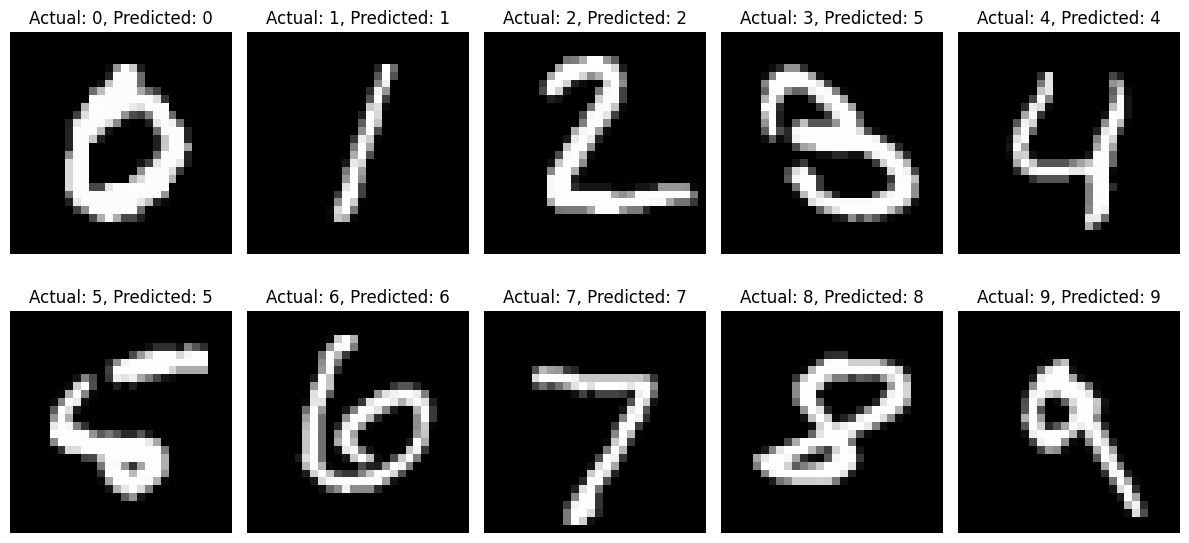

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

# Plot images with actual and predicted labels in order
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    # Find the index of the first occurrence of digit i in the test labels
    idx = np.where(actual_labels == i)[0][0]
    ax = axes[i // 5, i % 5]  # Calculate subplot index
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Actual: {actual_labels[idx]}, Predicted: {predicted_labels[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Define GoogLeNet-like architecture
def googlenet_model():
    input_layer = layers.Input(shape=(28, 28, 1))

    conv1 = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    pool1 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1)
    norm1 = layers.BatchNormalization()(pool1)

    inception2a = inception_module(norm1, 64, 96, 128, 16, 32, 32)
    inception2b = inception_module(inception2a, 128, 128, 192, 32, 96, 64)
    pool2 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(inception2b)

    inception3a = inception_module(pool2, 192, 96, 208, 16, 48, 64)
    inception3b = inception_module(inception3a, 160, 112, 224, 24, 64, 64)

    flatten = layers.Flatten()(inception3b)
    dense1 = layers.Dense(1024, activation='relu')(flatten)
    dropout = layers.Dropout(0.4)(dense1)
    output_layer = layers.Dense(10, activation='softmax')(dropout)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

def inception_module(prev_layer, conv1_filters, conv3_reduce_filters, conv3_filters, conv5_reduce_filters, conv5_filters, pool_filters):
    conv1 = layers.Conv2D(conv1_filters, (1, 1), padding='same', activation='relu')(prev_layer)

    conv3_reduce = layers.Conv2D(conv3_reduce_filters, (1, 1), padding='same', activation='relu')(prev_layer)
    conv3 = layers.Conv2D(conv3_filters, (3, 3), padding='same', activation='relu')(conv3_reduce)

    conv5_reduce = layers.Conv2D(conv5_reduce_filters, (1, 1), padding='same', activation='relu')(prev_layer)
    conv5 = layers.Conv2D(conv5_filters, (5, 5), padding='same', activation='relu')(conv5_reduce)

    pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(prev_layer)
    pool_conv = layers.Conv2D(pool_filters, (1, 1), padding='same', activation='relu')(pool)

    concat = layers.Concatenate(axis=-1)([conv1, conv3, conv5, pool_conv])
    return concat

# Create the model
model = googlenet_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/20
469/469 [==============================] - 587s 1s/step - loss: 0.1913 - accuracy: 0.9405 - val_loss: 0.0573 - val_accuracy: 0.9847
Epoch 2/20
469/469 [==============================] - 582s 1s/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.0486 - val_accuracy: 0.9851
Epoch 3/20
469/469 [==============================] - 580s 1s/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0437 - val_accuracy: 0.9860
Epoch 4/20
469/469 [==============================] - 578s 1s/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0388 - val_accuracy: 0.9883
Epoch 5/20
469/469 [==============================] - 587s 1s/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0266 - val_accuracy: 0.9911
Epoch 6/20
469/469 [==============================] - 583s 1s/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0366 - val_accuracy: 0.9902
Epoch 7/20
469/469 [==============================] - 579s 1s/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0333 - val_accuracy: 0.9905

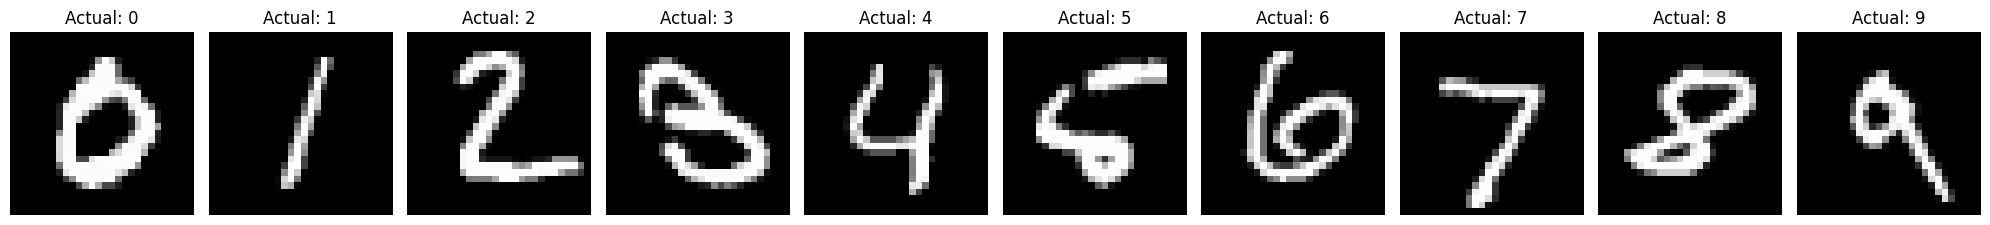

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Define labels for each digit
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Print the numbers from 0 to 9 along with their actual labels in a horizontal line
plt.figure(figsize=(20, 4))
for i in range(10):
    # Find the index of the first occurrence of digit i in the test labels
    idx = np.where(y_test == i)[0][0]

    # Plot the digit
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {labels[y_test[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
